In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Load
data = pd.read_excel(r'D:\pythonCode\Sector Mapping\DealerMapped_UF.xlsx')
print(data.head())

             GSTIN       HSN       Sector  Sector Code  Unnamed: 4  \
0  22BMWPM3936L1ZF  00440013  Advertising          1.0           8   
1  22AKZPR2078L1ZD  00440013  Advertising          1.0           8   
2  22AUTPB4627K1ZI  00440013  Advertising          1.0           8   
3  22ATSPG2600F2Z5  00440013  Advertising          1.0           8   
4  22AKFPS5510C1ZO  00440013  Advertising          1.0           8   

   Unnamed: 5  Unnamed: 6  
0           8           1  
1           8           1  
2           8           1  
3           8           1  
4           8           1  


In [4]:
# Split the 'HSN' column into a list of tokens
max_tokens = 20
data['HSN'] = data['HSN'].str.split(',', n=max_tokens)
new_df = data.explode('HSN')

# Reset the DataFrame index
new_df.reset_index(drop=True, inplace=True)
print(data,new_df)

                 GSTIN               HSN          Sector  Sector Code  \
0      22BMWPM3936L1ZF        [00440013]     Advertising          1.0   
1      22AKZPR2078L1ZD        [00440013]     Advertising          1.0   
2      22AUTPB4627K1ZI        [00440013]     Advertising          1.0   
3      22ATSPG2600F2Z5        [00440013]     Advertising          1.0   
4      22AKFPS5510C1ZO        [00440013]     Advertising          1.0   
...                ...               ...             ...          ...   
44380  22ABKPK5356J2ZI          [999621]  Works Contract         59.0   
44381  22ARNPR6016R1Z5  [999633, 995428]  Works Contract         59.0   
44382  22AAFFO7423E1ZM  [999691, 999699]  Works Contract         59.0   
44383  22AYQPG4386D1ZF          [999799]  Works Contract         59.0   
44384  22DKIPK2459A1ZK          [999799]  Works Contract         59.0   

       Unnamed: 4  Unnamed: 5  Unnamed: 6  
0               8           8           1  
1               8           8      

In [5]:
print("Total Records Read :",len(data))
print("Total Sectors:", data['Sector'].nunique())
print("Total Tags:", len(new_df))
print("Total Unique Tags :", new_df['HSN'].nunique())

Total Records Read : 44385
Total Sectors: 60
Total Tags: 155539
Total Unique Tags : 7741


In [6]:
sector_list = new_df['Sector'].unique().tolist()
#sector_list = ['Works Contract','Iron & Steel','Cement & Products','Automobile','Mining, Ores & Minerals']

# Tokenize the tags and count their occurrences
hsn_counts = Counter(new_df['HSN'])
print(sector_list)
print(hsn_counts)

['Advertising', 'Agriculture & Plantation Crops', 'Automobile', 'Aviation', 'Banking and Financial Institutions', 'Batteries of all Kinds', 'Bullion & Jewellery', 'Cement & Products', 'Cinema', 'Consultancy', 'Cotton', 'Dry Fruits', 'Ecommerce', 'Education and related service', 'Electricals', 'Electronics', 'Energy - Solar', 'Entertainment & Leisure', 'Fertilizers & Chemicals', 'FMCG (Fast Moving Consumer Goods)', 'Food Items', 'Furniture', 'Glass and their Products', 'Government', 'Health Health Care', 'Hotel and Restaurant', 'Infrastructure (Construction)', 'Insurance', 'Iron & Steel', 'IT & Computers - Hardware', 'IT & Computers - Software', 'Leather and their Articles', 'Machinery', 'Manpower', 'Marbles, Granites & Other Flooring Stones', 'Mining, Ores & Minerals', 'Non Ferrous Metals', 'Oil Seeds', 'Others', 'Paints & Chemicals', 'Pan Masala and related products like arecanut,etc (excluding tobacco & products)', 'Paper, News Prints & Stationary', 'Petroleum Products', 'Pharmaceuti

In [7]:
frequent_hsn = new_df.groupby('Sector')['HSN'].apply(lambda x: x.value_counts().head(5).index.tolist()).reset_index()
frequent_hsn.to_excel(r'D:\pythonCode\Sector Mapping\SectorsHSN.xlsx', index=False, engine='openpyxl')
print(frequent_hsn)

                                               Sector  \
0                                         Advertising   
1                      Agriculture & Plantation Crops   
2                                          Automobile   
3                                            Aviation   
4                  Banking and Financial Institutions   
5                              Batteries of all Kinds   
6                                 Bullion & Jewellery   
7                                   Cement & Products   
8                                              Cinema   
9                                         Consultancy   
10                                             Cotton   
11                                         Dry Fruits   
12                                          Ecommerce   
13                      Education and related service   
14                                        Electricals   
15                                        Electronics   
16                             

In [62]:
# Create a graph
G = nx.Graph()
G.add_nodes_from(frequent_hsn['Sector'], bipartite=0)

In [63]:
# Add nodes for frequent tags and edges connecting them to movie types
for index, row in frequent_hsn.iterrows():
    sector = row['Sector']
    hsn_list = row['HSN']
    G.add_edges_from([(sector, hsn) for hsn in hsn_list], bipartite=1)


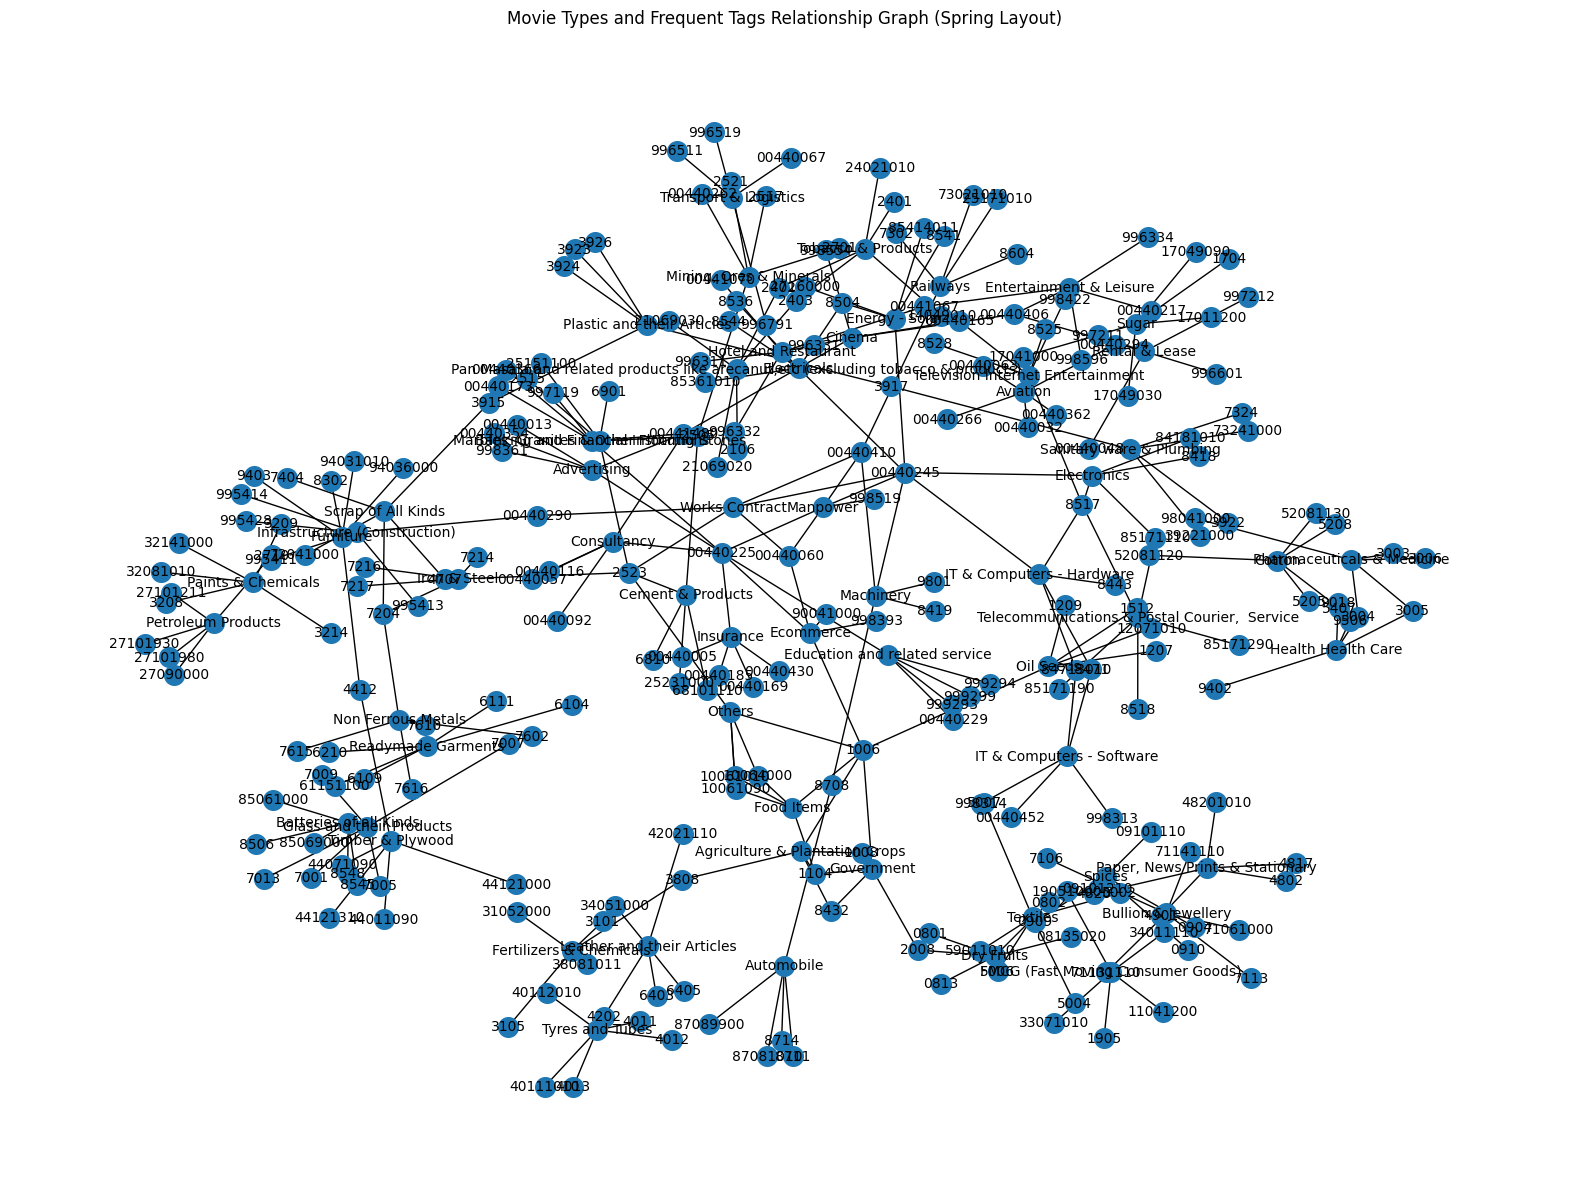

<Figure size 640x480 with 0 Axes>

In [64]:
# Create a layout using spring layout
pos = nx.spring_layout(G, seed=42, k=0.15)  # You can adjust the 'k' parameter to control node separation

# Draw the graph
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10, font_color="black")
plt.title("Movie Types and Frequent Tags Relationship Graph (Spring Layout)")
plt.axis('off')
plt.show()

# Save the image as a PNG
plt.savefig(r'D:\pythonCode\Sector Mapping\Sector_HSN.png', format='png', dpi=300)



In [65]:
from pyvis.network import Network

In [78]:
G = nx.Graph()

# Add nodes for movie types
G.add_nodes_from(frequent_hsn['Sector'], bipartite=0)

for index, row in frequent_hsn.iterrows():
    sector = row['Sector']
    hsn_list = row['HSN']
    G.add_edges_from([(sector, hsn) for hsn in hsn_list], bipartite=1)


# Create a layout using spring layout
pos = nx.spring_layout(G, seed=42, k=0.15)  # You can adjust the 'k' parameter to control node separation

# Initialize a pyvis network
net = Network(width="100%", height="800px",notebook=True)

# Add nodes to the pyvis network
for node, position in pos.items():
    x, y = position
    net.add_node(node, x=x, y=y)

# Add edges to the pyvis network
for edge in G.edges:
    net.add_edge(edge[0], edge[1])
# Draw the pyvis network
net.show("Sector_HSN.html")

# You can also save the HTML file using:
net.save_graph(r'D:\pythonCode\Sector Mapping\Sector_HSN.html')


Sector_HSN.html
